In [1]:
import bs4
import requests
import numpy as np
from PIL import Image
import io
from openpyxl import Workbook, load_workbook
from openpyxl.styles import PatternFill, Color
import pandas as pd
import matplotlib

In [2]:
url = 'https://en.wikipedia.org/wiki/Otter'

#download html
req = requests.get(url)
req.raise_for_status()

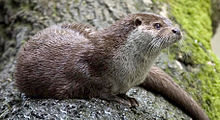

In [3]:
Soup = bs4.BeautifulSoup(req.text)
#get image
im_elem = Soup.select('img[decoding="async"]')

#select the first image of decent size to ensure its not a logo or thumbnail
for elem in im_elem:
    im_url = 'https:' + elem.get('src')
    im_req = requests.get(im_url)
    im_req.raise_for_status()
    im = im_req.content
    im = Image.open(io.BytesIO(im))
    if im.width > 50:
        break
img = np.asarray(im)

im

In [4]:
#create workbook and select worksheet
wb = Workbook()
ws = wb.active

In [5]:
#iterate through pixels, applying their colors to cells in the worksheet
for i in range(1,img.shape[0]+1):
    for j in range(1,img.shape[1]+1):
        color = matplotlib.colors.to_hex(img[i-1,j-1]/255, keep_alpha=False)[1:] #change RGB values to HexRGB
        cell = ws.cell(column=j, row=i, value=color)
        cell.fill = PatternFill("solid", fgColor=color)
        ws.row_dimensions[j].height = 42 

In [6]:
#save file
wb.save('Image.xlsx')